In [1]:
from pytorchcv.model_provider import get_model as ptcv_get_model
from torchvision.models import *
import pretrainedmodels
from sklearn.metrics import balanced_accuracy_score

from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from sklearn.metrics import confusion_matrix
from utils import *
import sys

For all our top 4 performing models we used the same code these differences.

1. Changed the model name in `mdl` function below
2. Changed the learning rates in `learn.fit_one_cycle(n, max_lr=slice(lr1, lr2))` with technique described in the Methods section of final report
3. For each model we saved the model with different names. The names of the weights file are in the list below
4. The list of the model names( that need to be changed in `mdl` function) and the weight files is the following:
    - efficientnet_b0 --> EfficientNet-b0 --> 'best_model_effb0pr-0' (weight file name)
    - efficientnet_b1 --> EfficientNet-b1 -->  'best_model_effb1-1'  (weight file name)
    - resnext50_32x4d --> ResNeXt50 --> 'resnext50_notpr-0' (weight file name)
5. Changed the `IMG_SIZE`. the list of the image sizes is the following:
    - ResNeXt50 --> 299
    - EfficientNet-b0 --> 448
    - EfficientNet-b0 --> 448

In [2]:
BATCH_SIZE = 32        
IMG_SIZE = 299      
tfms = get_transforms(
                  max_lighting=0.2, max_warp=0.2, 
                  p_affine=0.75, p_lighting=0.75 ,xtra_tfms=[contrast(scale=(0.5, 1), p=0.75), brightness(change=0.6),
                                                             jitter(magnitude=0.01),perspective_warp(magnitude=5)])
data = ImageDataBunch.from_folder('data', ds_tfms=tfms,size=IMG_SIZE, bs=BATCH_SIZE)
print(data.classes)
data

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


ImageDataBunch;

Train: LabelList (8182 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
nv,nv,nv,nv,nv
Path: data;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
nv,nv,nv,nv,nv
Path: data;

Test: None

In [5]:
def mdl(pretrained=False):
    return ptcv_get_model("resnext26_32x4d", pretrained=True).features

In [6]:
learn = cnn_learner(data, mdl, pretrained=True,
                    cut=noop, metrics=[FBeta('macro', beta=1), accuracy], split_on=lambda m: (m[0][4], m[1]))
learn.freeze_to(-1)

In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,1.178394,0.809778,0.435459,0.724413,04:26
1,0.843849,0.746665,0.420971,0.752371,04:23
2,0.805543,0.650751,0.473264,0.765352,04:29
3,0.761739,0.590964,0.533940,0.790814,04:26
4,0.604318,0.528177,0.587688,0.811283,04:26
5,0.581149,0.525088,0.579346,0.813779,04:29
6,0.615109,0.468201,0.656912,0.834748,04:32
7,0.547432,0.456225,0.671141,0.834249,04:22
8,0.488257,0.454241,0.647494,0.834748,04:22
9,0.542139,0.478530,0.636432,0.822766,04:23


In [12]:
learn.save('best_model_nexttest-0')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

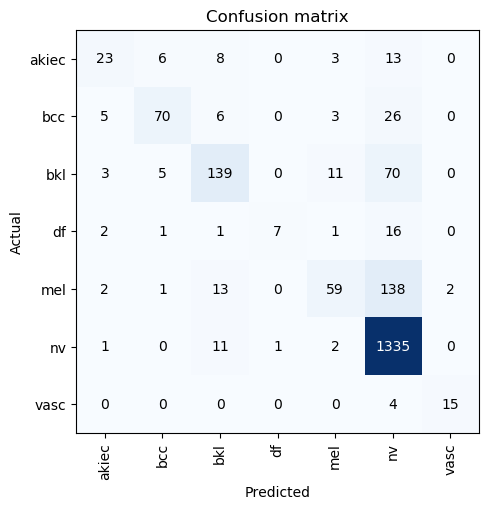

In [11]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
learn.load('best_model_nexttest-0')

epoch,train_loss,valid_loss,f_beta,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.31E-06


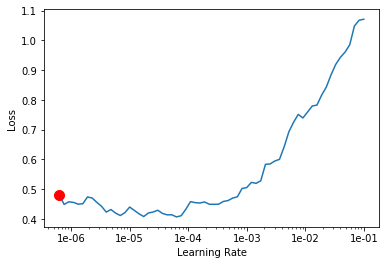

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [15]:
learn.unfreeze()
learn.fit_one_cycle(30,max_lr=slice(1e-6,1e-4))
learn.save('best_model_nexttest-1')

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.539104,0.436599,0.691275,0.840739,05:38
1,0.476209,0.453558,0.650236,0.830255,05:37
2,0.479226,0.444366,0.676574,0.834249,05:37
3,0.478026,0.429085,0.701219,0.843235,05:34
4,0.421532,0.410985,0.720243,0.848228,05:33
5,0.420586,0.391650,0.726647,0.852222,05:33
6,0.429312,0.368964,0.733381,0.864204,05:37
7,0.380201,0.409739,0.699654,0.854718,05:40
8,0.337007,0.376121,0.734845,0.865701,05:42
9,0.408153,0.338188,0.763659,0.878183,05:44
